<IPython.core.display.Javascript object>


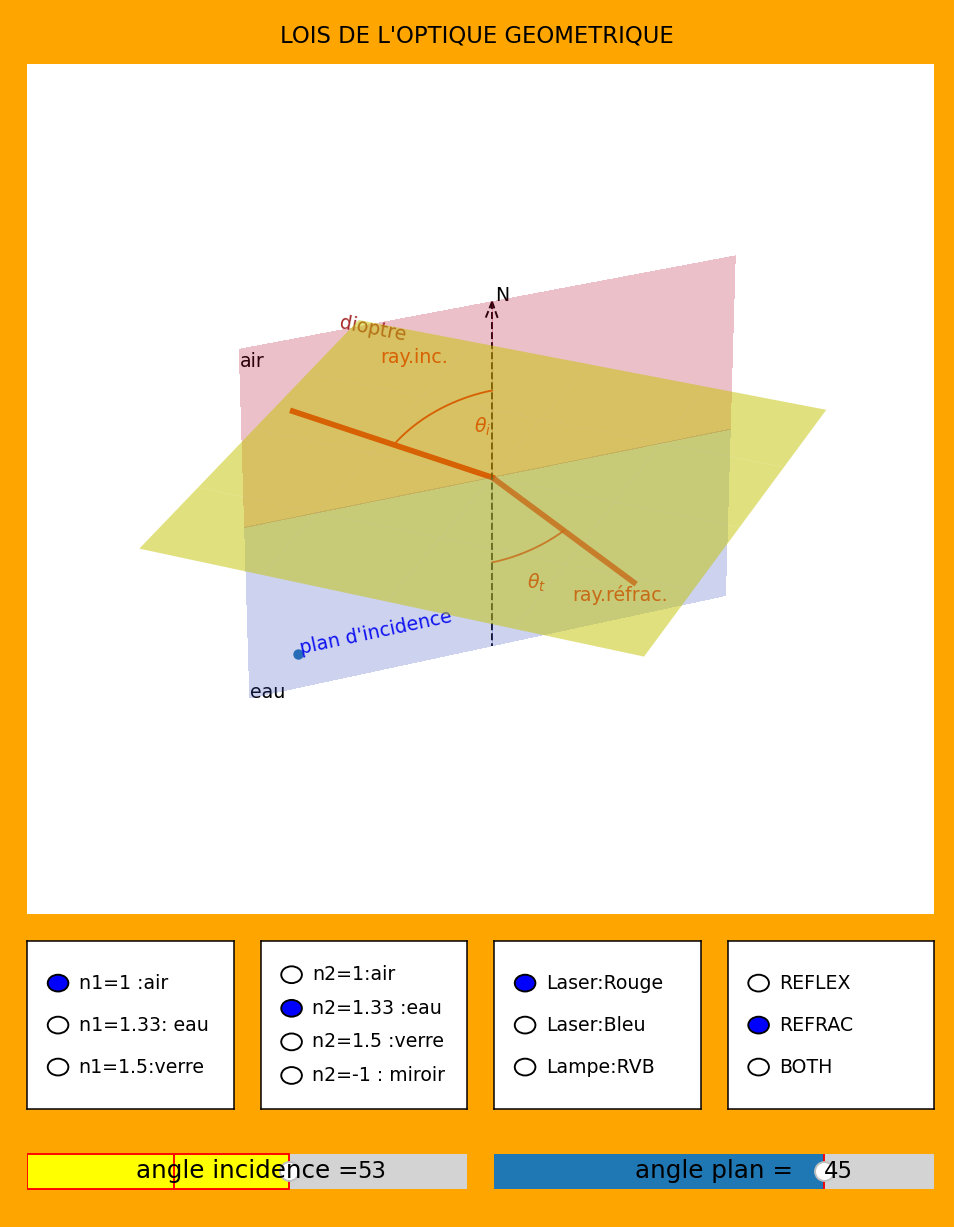

In [2]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
from numpy import sin,cos
from matplotlib.widgets import Slider, RadioButtons
from matplotlib import cm


def efface_disque(n):
    for c in axe.artists:
        c.get_gid()
        if c.get_gid()==n:
           c.remove()
# effacer des lignes spécifiques après un plot

def test():
    print("ok")
          
def remove_lignes(id):
    for c in axe.lines: 
        if c.get_gid() == id:
            c.remove()
def remove_textes(id):
    for c in axe.texts: 
        if c.get_gid() == id:
            c.remove()
def update_lignes(id,etat):
    for c in axe.lines: 
        if c.get_gid() == id:
            c.set_visible(etat)
                      
#pour effacer les surface plot_surface            
def remove_surfaces(id):
    for c in axe.collections: 
        if c.get_gid() == id:
            
            c.remove()
def transposer(psi,theta,phi,A=[[],[],[]]):
    psi0=np.radians(psi)
    theta0=np.radians(theta)
    phi0=np.radians(phi)
    Euler0=[[cos(psi0)*cos(phi0)-cos(theta0)*sin(phi0)*sin(psi0),-cos(psi0)*sin(phi0)-cos(theta0)*cos(phi0)*sin(psi0),sin(psi0)*sin(theta0)],
            [sin(psi0)*cos(phi0)+cos(theta0)*sin(phi0)*cos(psi0),cos(theta0)*cos(phi0)*cos(psi0)-sin(psi0)*sin(phi0),-cos(psi0)*sin(theta0)],[sin(theta0)*sin(phi0),sin(theta0)*cos(phi0),cos(theta0)]]
    B=np.dot(Euler0,A)
    return B

class Rayon:
    def __init__(self,r0=10, angle_i=30,rotation=45,source='Rouge',milieu1="air",milieu2="eau",vue1=False,vue2=True):
        self.r0=r0
        self.angle_i=angle_i
        self.rotation=rotation
        self.source=source
        self.indice1R=1.0
        self.indice1B=1.0
        self.indice1V=1.0
        self.indice2R=1.33
        self.indice2B=1.33
        self.indice2V=1.33
        self.milieu1=milieu1
        self.milieu2=milieu2
        if(milieu1=="air"):
            self.indice1R=1.0
            self.indice1B=1.0
            self.indice1V=1.0
        elif(milieu1=="eau"):
            self.indice1R=1.33
            self.indice1B=1.33
            self.indice1V=1.33
        else:
            self.indice1R=1.47
            self.indice1B=1.55
            self.indice1V=1.51
        if(milieu2=="eau"):    
            self.indice2R=1.33
            self.indice2B=1.33
            self.indice2V=1.33
        elif(milieu2=="air"):
            self.indice2R=1.0
            self.indice2B=1.0
            self.indice2V=1.0
        elif(milieu2=="verre"):    
            self.indice2R=1.47
            self.indice2B=1.55
            self.indice2V=1.51
        else:
            self.indice2R=-1.0
            self.indice2B=-1.0
            self.indice2V=-1.0
        self.reflex_visible=vue1
        self.refrac_visible=vue2
    
    
    def totale(self,angle_incident,raie="rouge"):
        if (raie=="rouge"):    
            n1=self.indice1R
            n2=self.indice2R
        elif (raie=="bleu"):
            n1=self.indice1B
            n2=self.indice2B
        elif (raie=="vert"):
            n1=self.indice1V
            n2=self.indice2V
        else:    #valable si pas dans verre
            n1=self.indice1R
            n2=self.indice2R
        total=False
        test=(n1*sin(np.deg2rad(angle_incident)))/n2
        if test >= 1.0:
            total=True
        return total
    
    def get_visible(self):
        vue1=self.reflex_visible
        vue2=self.refrac_visible
        return vue1,vue2

    def set_visible(self,voir_reflechi,voir_refracte):
        self.reflex_visible=voir_reflechi
        self.refrac_visible=voir_refracte

    def get_source(self):
        source=self.source
        return source

    def set_source(self,source):
        self.source=source

    def get_indice(self):
        n1R=self.indice1R
        n2R=self.indice2R
        n1B=self.indice1B
        n2B=self.indice2B

        n1V=self.indice1V
        n2V=self.indice2V
        return n1R,n2R,n1B,n2B,n1V,n2V

    def set_indice(self,n1R,n2R,n1B,n2B,n1V,n2V):
        self.indice1R=n1R
        self.indice1B=n1B
        self.indice1V=n1V
        self.indice2V=n2V
        self.indice2R=n2R
        self.indice2B=n2B
    
    def get_milieu(self):
        m1=self.milieu1
        m2=self.milieu2
        return m1,m2

    def set_milieu(self,m1,m2):
        self.milieu1=m1
        self.milieu2=m2    
    
    def get_angle(self):
        return self.angle_i

    def set_angle(self,valeur):
        self.angle_i=valeur
    
    def get_rotation(self):
        return self.manuel

    def set_rotation(self,valeur):
        self.rotation=valeur
    
    def incident(self):
        ri=self.r0
        ra=ri/2
        rb=2*ri/5
        angle_i=self.angle_i
        phii=self.rotation
        r=np.linspace(ri,0,101)
        zi=r*cos(np.deg2rad(angle_i))
        xi=-r*sin(np.deg2rad(angle_i))

        #xi=rho*cos(np.deg2rad(phii))
        #yi=rho*sin(np.deg2rad(phii))
        yi=np.zeros_like(xi)
        arc=np.linspace(0,angle_i,21)
        arcz= ra*np.cos(np.radians(arc))
        arcx=-ra*np.sin(np.radians(arc))
        arcy = np.zeros_like(arcz)
        ArcA=[arcx,arcy,arcz]
        labelz= rb*np.cos(np.radians(angle_i/2))
        labelx=-rb*np.sin(np.radians(angle_i/2))
        labely = np.zeros_like(labelz)
        Poslabel=[labelx,labely,labelz]
        return xi,yi,zi,ArcA,Poslabel
    
    def reflexion(self):
        rr=self.r0
        ra=rr/2
        rb=2*rr/5
        angle_r=self.angle_i
        phir=self.rotation
        r=np.linspace(0,rr,101)
        zr=r*cos(np.deg2rad(angle_r))
        rho=r*sin(np.deg2rad(angle_r))
        xr=rho*cos(np.deg2rad(phir))
        yr=rho*sin(np.deg2rad(phir))
        arc=np.linspace(0,angle_r,21)
        arcz= ra*np.cos(np.radians(arc))
        arcx=ra*np.sin(np.radians(arc))
        arcy = np.zeros_like(arcz)
        ArcA=[arcx,arcy,arcz]
        labelz= rb*np.cos(np.radians(angle_r/2))
        labelx=rb*np.sin(np.radians(angle_r/2))
        labely = np.zeros_like(labelz)
        Poslabel=[labelx,labely,labelz]
    
        return xr,yr,zr,ArcA,Poslabel

    def refraction(self,raie="rouge"):
        if raie=="rouge":
            n1=self.indice1R
            n2=self.indice2R
        elif raie=="bleu":
            n1=self.indice1B
            n2=self.indice2B 
        elif raie == "vert":
            n1=self.indice1V
            n2=self.indice2V
        else :
            n1=self.indice1R
            n2=self.indice2R
        rt=self.r0
        ra=rt/2
        rb=3*rt/5
        angle_i=self.angle_i
        angle_t=np.rad2deg(np.arcsin((n1*sin(np.deg2rad(angle_i)))/n2))
        
        phit=self.rotation
        r=np.linspace(0,rt,101)
        zt=-r*cos(np.deg2rad(angle_t))
        rho=r*sin(np.deg2rad(angle_t))
        xt=rho*cos(np.deg2rad(phit))
        yt=rho*sin(np.deg2rad(phit))
        arc=np.linspace(0,angle_t,21)
        arcz= -ra*np.cos(np.radians(arc))
        arcx=ra*np.sin(np.radians(arc))
        arcy = np.zeros_like(arcz)
        ArcA=[arcx,arcy,arcz]
        labelz= -rb*np.cos(np.radians(angle_t/2))
        labelx=rb*np.sin(np.radians(angle_t/2))
        labely = np.zeros_like(labelz)
        Poslabel=[labelx,labely,labelz]
        return xt,yt,zt,ArcA,Poslabel

rayon1=Rayon() 

"""
permet de rendre visible les plot3D en cliquant sur REFLEX, REFRAC et BOTH prend en compte la source Rouge, Bleu ou RVB
On considère que les valeurs sont déjà calculées et ne fait que rendre visible les rayons et arcs en fct des situations
Attention il faut double-cliquer
"""
def update_visible(label):
    #lecture de la source et des milieux sans calculs ainsi que l angle incidence
    source=rayon1.get_source()
    n1R,n2R,n1B,n2B,n1V,n2V=rayon1.get_indice()
    milieu1,milieu2=rayon1.get_milieu()
    val5=int(slider5.val)
    # teste si reflexion totale d'un ou plusieurs rayons
    # Attention tous les rayon refractant sont en reflexion totale car 
    #cette fonction sélectionne un rayons pour une valeur donnée
    totalR=rayon1.totale(val5,"rouge")
    totalB=rayon1.totale(val5,"bleu")
    totalV=rayon1.totale(val5,"vert")
    totalW=rayon1.totale(val5,"beige")
    #on initialise les rayos et arcs à visible==False sauf le rayons incident
    rayon_reflechi=angle_reflechi=False
    rayon_refracte_R=rayon_refracte_B=rayon_refracte_V=rayon_refracte_W=rayon_refracte_C=False
    angle_refracte_R=angle_refracte_B=angle_refracte_V=angle_refracte_W=angle_refracte_C=False
    Label_RT.set_visible(False)
    #si rayoon reflechi activé alpha=0.2 ou si n2 == -1 alpha=1

    if (label == "REFRAC" or label=="BOTH"):
        ## si refracte on regarde la source et on affiche le rayon correspondant
        ##  si la source est rouge ou bleu pas de soucis, si la source est RVB il faut des tests
        if(source=="Rouge"):
            ##on test si total ou pas
            rayon_refracte_R=angle_refracte_R=True #☺ calcul de alpha dans update_angle
            Label_RT.set_visible(True)
        elif source=="Bleu" :
            rayon_refracte_B=angle_refracte_B=True
            Label_RT.set_visible(True)
        else: ## si SOURCE RVB et si n2==- ce sera du réflechi
            if(totalR and totalB and totalV ):  ##  refraction total du rayon blanc
                angle_refracte_W=rayon_refracte_W=True
                
            elif (totalR==False and totalV==False and totalB==True) :## on ffiche rouge, vert et bleu avec reflexion totale
                angle_refracte_R=rayon_refracte_R=True
                angle_refracte_B=rayon_refracte_B=True
                angle_refracte_V=rayon_refracte_V=True
                
            elif (totalR==False and totalV==True and totalB==True) :## on affiche du cyan reflexion totale et rouge
                angle_refracte_R=rayon_refracte_R=True
                angle_refracte_C=rayon_refracte_C=True
            elif (n2R==-1):
                rayon_reflechi=angle_reflechi=False
            elif (milieu1 !="verre" and milieu2 != "verre"): 
                angle_refracte_W=rayon_refracte_W=True
                Label_RT.set_visible(True)
            else:   ### si pas de refraction totale et verre
                angle_refracte_R=rayon_refracte_R=True
                angle_refracte_B=rayon_refracte_B=True
                angle_refracte_V=rayon_refracte_V=True

    if (label == "REFLEX" or label=="BOTH"):
        rayon_reflechi=angle_reflechi=True
            
    if (label == "REFLEX"):
        rayon1.set_visible(voir_reflechi=True,voir_refracte=False)

    elif (label=="REFRAC"):
        rayon1.set_visible(voir_reflechi=False,voir_refracte=True)
    else:
        rayon1.set_visible(voir_reflechi=True,voir_refracte=True) # il faut prendre en compte le cas ou n2=-1 
   
    Label_reflechi.set_visible(angle_reflechi)
    Label_refracte_R.set_visible(angle_refracte_R)
    Label_refracte_B.set_visible(angle_refracte_B)
    Label_refracte_V.set_visible(angle_refracte_V)
    Label_refracte_W.set_visible(angle_refracte_W)
    Label_refracte_C.set_visible(angle_refracte_C)
    update_lignes("rayon_reflechi",rayon_reflechi)
    update_lignes("rayon_refracte_R",rayon_refracte_R)
    update_lignes("rayon_refracte_B",rayon_refracte_B)
    update_lignes("rayon_refracte_V",rayon_refracte_V)
    update_lignes("rayon_refracte_W",rayon_refracte_W)
    update_lignes("rayon_refracte_C",rayon_refracte_C)
    update_lignes("angle_reflechi",angle_reflechi)
    update_lignes("angle_refracte_R",angle_refracte_R)
    update_lignes("angle_refracte_B",angle_refracte_B)
    update_lignes("angle_refracte_V",angle_refracte_V)
    update_lignes("angle_refracte_W",angle_refracte_W)
    update_lignes("angle_refracte_C",angle_refracte_C)
    
    
def update_source(label):
    bout=str(label)
    source="Rouge"
    if bout.rfind("Rouge") > -1:
        source="Rouge"
    elif bout.rfind("Bleu") > -1:
        source="Bleu"
    else:
        source="RVB"
    rayon1.set_source(source)
    angle=rayon1.get_angle()
    update_angle(angle)

def update_indice(label):
    bout1=str(boutons1.value_selected)
    bout2=str(boutons2.value_selected)
    indice1R= indice1B=indice1V =1
    indice2R= indice2B=indice2V =1.33
    milieu1,milieu2=rayon1.get_milieu()
    if bout1.rfind("air") > -1:
        indice1R=1.0
        indice1B=1.0
        indice1V=1.0
        milieu1="air"
    elif bout1.rfind("eau") > -1:
        indice1R=1.33
        indice1B=1.33
        indice1V=1.33
        milieu1="eau"
    else:
        indice1R=1.47   
        indice1B=1.55
        indice1V=1.51
        milieu1="verre"
    
    if bout2.rfind("air") > -1:
        indice2R=1.0
        indice2B=1.0
        indice2V=1.0
        milieu2="air"
    elif bout2.rfind("eau") > -1:
        indice2R=1.33
        indice2B=1.33
        indice2V=1.33
        milieu2="eau"
    elif bout2.rfind("verre") > -1:
        indice2R=1.47
        indice2B=1.55
        indice2V=1.51
        milieu2="verre"
    else:
        indice2R=-1.0
        indice2B=-1.0
        indice2V=-1.0
        milieu2="miroir"
    rayon1.set_indice(indice1R,indice2R,indice1B,indice2B,indice1V,indice2V)
    rayon1.set_milieu(milieu1,milieu2)
    angle=rayon1.get_angle()
    update_angle(angle)
        
def update_angle(label):
    #on initialise les rayos et arcs à visible==False sauf le rayons incident
    voir_rayon_reflechi=voir_rayon_refracte_R=voir_rayon_refracte_B=voir_rayon_refracte_V=voir_rayon_refracte_W=voir_rayon_refracte_C=False
    alpha_reflechi=0.2
    alpha_R=alpha_B=alpha_V=alpha_W=alpha_C=0.8
    alpha_refracte=0.8
    Label_RT.set_visible(False)
    col_reflechi="red"
    col_incident="red"
    remove_lignes("angle_incident")
    remove_lignes("rayon_incident")
    remove_lignes("rayon_reflechi")
    remove_lignes("angle_reflechi")
    remove_lignes("rayon_refracte_R")
    remove_lignes("rayon_refracte_B")
    remove_lignes("rayon_refracte_V")
    remove_lignes("rayon_refracte_W")
    remove_lignes("rayon_refracte_C")
    remove_lignes("angle_refracte_R")
    remove_lignes("angle_refracte_B")
    remove_lignes("angle_refracte_V")
    remove_lignes("angle_refracte_W")
    remove_lignes("angle_refracte_C")
    remove_surfaces("tata")
    voir_reflechi,voir_refracte=rayon1.get_visible()
    source=rayon1.get_source()
    n1R,n2R,n1B,n2B,n1V,n2V=rayon1.get_indice()
    
    val5=int(slider5.val)
    val6=int(slider6.val)
    rayon1.set_angle(val5)
    rayon1.set_rotation(val6)
    psi=val6
    totalR=rayon1.totale(val5,"rouge")
    totalB=rayon1.totale(val5,"bleu")
    totalV=rayon1.totale(val5,"vert")
    totalW=rayon1.totale(val5,"beige")
    milieu1,milieu2=rayon1.get_milieu()
   
    
    ## traitement incidence et reflexion
    voir_rayon_reflechi=voir_reflechi
    if(n2R==-1):
        alpha_reflechi=1
        alpha_refracte=0.0  ### attention il calcule quand meme rayon refractee == source d erreur
    else:
        alpha_reflechi=0.2
    if(source=="Rouge"):
        col_incident="red"
        col_reflechi="red"
        
    elif (source=="Bleu"):
        col_incident="blue"
        col_reflechi="blue"
      
    else:
        col_incident="beige"
        col_reflechi="beige"
    
    xi,yi,zi,arc1,plab1=rayon1.incident()
    pI=[xi,yi,zi]
    pI=transposer(psi,0,0,pI)
    xi=pI[0]
    yi=pI[1]
    zi=pI[2]
    plab1=transposer(psi,0,0,plab1)
    arc1=transposer(psi,0,0,arc1)
    
    xr,yr,zr,arc2,plab2=rayon1.reflexion()
    arc2=transposer(psi,0,0,arc2)
    plab2=transposer(psi,0,0,plab2)
             
    
    #traitement refraction et reflexion totale
    xtR,ytR,ztR,arc3,plab3=rayon1.reflexion()
    xtB,ytB,ztB,arc4,plab4=rayon1.reflexion()
    xtV,ytV,ztV,arc5,plab5=rayon1.reflexion()
    xtW,ytW,ztW,arc6,plab6=rayon1.reflexion()
    xtC,ytC,ztC,arc7,plab7=rayon1.reflexion()
    
    if(source=="RVB" and n2R >-1):     #si source R+V+B on trace rayons réfracte u
        if(totalR==True and totalB==True and totalV==True): # si total rouge, vert et bleu alors blanc
            voir_rayon_refracte_W=voir_refracte
            xtW,ytW,ztW,arc6,plab6=rayon1.reflexion()

        elif ((totalV==False) and(totalR==False) and (totalB==True)):# refraction totale bleu
            xtR,ytR,ztR,arc2,plab3=rayon1.refraction("rouge")
            xtV,ytV,ztV,arc5,plab5=rayon1.refraction("vert")
            xtB,ytB,ztB,arc4,plab4=rayon1.reflexion()
            voir_rayon_refracte_R=voir_refracte
            voir_rayon_refracte_V=voir_refracte
            voir_rayon_refracte_B=voir_refracte

        elif ((totalV==True) and(totalR==False) and (totalB==True)):# refraction totale bleu et vert donne cyan
            xtR,ytR,ztR,arc3,plab3=rayon1.refraction("rouge")
            xtC,ytC,ztC,arc7,plab7=rayon1.reflexion()
            voir_rayon_refracte_R=voir_refracte
            voir_rayon_refracte_C=voir_refracte
       
        elif (n1R==n2R):
            xtW,ytW,ztW,arc6,plab6=rayon1.refraction("beige")
            voir_rayon_refracte_W=voir_refracte
            alpha_W=1.0
            alpha_reflechi=0
           
        elif (milieu1 !="verre"  and milieu2 != "verre"):
            if(totalW ==False):
                xtW,ytW,ztW,arc6,plab6=rayon1.refraction("beige")
                voir_rayon_refracte_W=voir_refracte
                alpha_W=0.8
                alpha_reflechi=0.2
            else:
                xtW,ytW,ztW,arc6,plab6=rayon1.reflexion()
                voir_rayon_refracte_W=voir_refracte
                alpha_W=0.8
                alpha_reflechi=0.2
        else:
            xtR,ytR,ztR,arc3,plab3=rayon1.refraction("rouge")
            xtV,ytV,ztV,arc5,plab5=rayon1.refraction("vert")
            xtB,ytB,ztB,arc4,plab4=rayon1.refraction("bleu")
            voir_rayon_refracte_R=voir_refracte
            voir_rayon_refracte_V=voir_refracte
            voir_rayon_refracte_B=voir_refracte
            
    if (source=="Rouge" and n2R!=-1):
        if(totalR==True):
            xtR,ytR,ztR,arc3,plab3=rayon1.reflexion()
    
        elif (n2R==n1R):
            xtR,ytR,ztR,arc3,plab3=rayon1.refraction("rouge")
            alpha_R=1.0
            alpha_reflechi=0
        else:
            xtR,ytR,ztR,arc3,plab3=rayon1.refraction("rouge")
        voir_rayon_refracte_R=voir_refracte     
        
   
    if (source=="Bleu" and n2R!=-1):
        if(totalB==True):
            xtB,ytB,ztB,arc4,plab4=rayon1.reflexion()
        elif(n2B==n1B):
            xtB,ytB,ztB,arc4,plab4=rayon1.refraction("bleu")
            alpha_B=1.0
            alpha_reflechi=0
        else:
            xtB,ytB,ztB,arc4,plab4=rayon1.refraction("bleu")
        voir_rayon_refracte_B=voir_refracte     
    

    
    arc3=transposer(psi,0,0,arc3)
    plab3=transposer(psi,0,0,plab3)
    arc4=transposer(psi,0,0,arc4)
    plab4=transposer(psi,0,0,plab4)
    arc5=transposer(psi,0,0,arc5)
    plab5=transposer(psi,0,0,plab5)
    arc6=transposer(psi,0,0,arc6)
    plab6=transposer(psi,0,0,plab6)
    arc7=transposer(psi,0,0,arc7)
    plab7=transposer(psi,0,0,plab7)
  
                 
    Trait1=Axes3D.plot3D(axe,xi,yi,zi,color=col_incident,lw=3,gid="rayon_incident")
    Trait2=Axes3D.plot3D(axe,xr,yr,zr,color=col_reflechi,lw=3, alpha=alpha_reflechi,gid="rayon_reflechi",visible=voir_rayon_reflechi)
    Trait3=Axes3D.plot3D(axe,xtR,ytR,ztR,color="red",lw=3, alpha=alpha_R,gid="rayon_refracte_R",visible=voir_rayon_refracte_R)
    Trait4=Axes3D.plot3D(axe,xtB,ytB,ztB,color="blue",lw=3, alpha=alpha_B,gid="rayon_refracte_B",visible=voir_rayon_refracte_B)
    Trait5=Axes3D.plot3D(axe,xtV,ytV,ztV,color="green",lw=3, alpha=alpha_V,gid="rayon_refracte_V",visible=voir_rayon_refracte_V)
    Trait6=Axes3D.plot3D(axe,xtW,ytW,ztW,color="beige",lw=3, alpha=alpha_W,gid="rayon_refracte_W",visible=voir_rayon_refracte_W)
    Trait7=Axes3D.plot3D(axe,xtC,ytC,ztC,color="cyan",lw=3, alpha=alpha_C,gid="rayon_refracte_C",visible=voir_rayon_refracte_C)
    
    
    Arc1=Axes3D.plot3D(axe,arc1[0],arc1[1],arc1[2],color=col_incident,lw=1,gid="angle_incident")
    Arc2=Axes3D.plot3D(axe,arc2[0],arc2[1],arc2[2],color=col_reflechi,lw=1,alpha=alpha_reflechi,ls="--",gid="angle_reflechi",visible=voir_rayon_reflechi)
    Arc3=Axes3D.plot3D(axe,arc3[0],arc3[1],arc3[2],color="red",lw=1, alpha=alpha_R,gid="angle_refracte_R",visible=voir_rayon_refracte_R)
    Arc4=Axes3D.plot3D(axe,arc4[0],arc4[1],arc4[2],color="blue",lw=1, alpha=alpha_B,gid="angle_refracte_B",visible=voir_rayon_refracte_B)
    Arc5=Axes3D.plot3D(axe,arc5[0],arc5[1],arc5[2],color="green",lw=1, alpha=alpha_V,gid="angle_refracte_V",visible=voir_rayon_refracte_V)
    Arc6=Axes3D.plot3D(axe,arc6[0],arc6[1],arc6[2],color="beige",lw=1, alpha=alpha_W,gid="angle_refracte_W",visible=voir_rayon_refracte_W)
    Arc7=Axes3D.plot3D(axe,arc7[0],arc7[1],arc7[2],color="cyan",lw=1, alpha=alpha_C,gid="angle_refracte_C",visible=voir_rayon_refracte_C)
    
    
    Label_incident._position3d=(plab1[0]+0.5,plab1[1]-0.5,plab1[2]-0.5)
    Label_reflechi._position3d=(plab2[0]+0.5,plab2[1]-0.5,plab2[2]-0.5)
    Label_refracte_R._position3d=(plab3[0]+0.5,plab3[1]-0.5,plab3[2]-0.5)
    Label_refracte_B._position3d=(plab4[0]+0.5,plab4[1]-0.5,plab4[2]-0.5)
    Label_refracte_V._position3d=(plab5[0]+0.5,plab5[1]-0.5,plab5[2]-0.5)
    Label_refracte_W._position3d=(plab6[0]+0.5,plab6[1]-0.5,plab6[2]-0.5)
    Label_refracte_C._position3d=(plab7[0]+0.5,plab7[1]-0.5,plab7[2]-0.5)
    Label_incident.set_visible(True)
    Label_reflechi.set_visible(voir_rayon_reflechi)
    Label_reflechi.set_alpha(alpha_reflechi)
    Label_refracte_R.set_visible(voir_rayon_refracte_R)
    Label_refracte_B.set_visible(voir_rayon_refracte_B)
    Label_refracte_V.set_visible(voir_rayon_refracte_V)
    Label_refracte_W.set_visible(voir_rayon_refracte_W)
    Label_refracte_C.set_visible(voir_rayon_refracte_C)
    Label_incident.set_color(col_incident)
    Label_reflechi.set_color(col_reflechi)
    
    x=np.linspace(-10,10,41)
    y=np.linspace(-10,10,41)
    x,y=np.meshgrid(x,y)
    z=np.zeros_like(x)
    x1=np.ravel(x)
    y1=np.ravel(y)
    z1=np.ravel(z)
    AA=np.array([x1,y1,z1])
    BB=transposer(psi,90,0,AA)
    xx=BB[0,:].reshape(41,41)
    yy=BB[1,:].reshape(41,41)
    zz=BB[2,:].reshape(41,41)
    Axes3D.plot_surface(axe,xx,yy,zz,color="white",cstride=20,rstride=20,cmap=cm.coolwarm,alpha=0.25,linewidth=0, antialiased=False,gid="tata")
    texte_M1,texte_M2=rayon1.get_milieu()
    

    #texte_M1="milieu1:"+texte_M1
    #texte_M2="milieu2:"+texte_M2
    Pos_M1=[-10,0,9]
    Pos_M1=transposer(psi,0,0,Pos_M1)
    Label_M1.set_text(texte_M1)
    Label_M1._position3d=(Pos_M1[0],Pos_M1[1],Pos_M1[2])

    Pos_M2=[-10,0,-10]
    Pos_M2=transposer(psi,0,0,Pos_M2)
    Label_M2.set_text(texte_M2)
    Label_M2._position3d=(Pos_M2[0],Pos_M2[1],Pos_M2[2])
    Label_RI._position3d=(xi[10],yi[10],zi[10])
    Label_RI.set_color(col_incident)
    pI=[-8,-8,0]
    pI=transposer(psi,90,0,pI)
    remove_textes("label_I")
   # ._position3d=(pI[0],pI[1],pI[2])
    dirI=[1,0,0]
    dirI=transposer(psi,0,0,dirI)
    #labelI#set_3d_properties(pI[0],pI[1],pI[2],zdir=(dirI[0],dirI[1],dirI[2]))
    Axes3D.text3D(axe,pI[0],pI[1],pI[2],s="plan d'incidence",color="blue",gid="label_I",zdir=(dirI[0],dirI[1],dirI[2]))

    
    if(source=="Rouge"):
        Pos_RT=[xtR[90],ytR[90],ztR[90]]
        Label_RT._position3d=(Pos_RT[0],Pos_RT[1],Pos_RT[2])
        Label_RT.set_color("red")
        Label_RT.set_visible(voir_rayon_refracte_R)
    elif (source=="Bleu"):
        Pos_RT=[xtB[90],ytB[90],ztB[90]]
        Label_RT._position3d=(Pos_RT[0],Pos_RT[1],Pos_RT[2])
        Label_RT.set_color("blue")
        Label_RT.set_visible(voir_rayon_refracte_B)
    elif(source=="RVB" and milieu1 != "verre" and milieu2 != "verre"):
        Pos_RT=[xtW[90],ytW[90],ztW[90]]
        Label_RT._position3d=(Pos_RT[0],Pos_RT[1],Pos_RT[2])
        Label_RT.set_color("beige")
        Label_RT.set_visible(voir_rayon_refracte_W)
        
    
cols=["red","blue","green"]      
#rr=np.linspace(10,0,101,retstep=True)
#print(rr)
x=np.linspace(-10,10,41)
y=np.linspace(-10,10,41)
x,y=np.meshgrid(x,y)
z=np.zeros_like(x)
x1=np.ravel(x)
y1=np.ravel(y)
z1=np.ravel(z)
AA=np.array([x1,y1,z1])
BB=transposer(45,90,0,AA)

xx=BB[0,:].reshape(41,41)
yy=BB[1,:].reshape(41,41)
zz=BB[2,:].reshape(41,41)

fig = plt.figure(figsize=(7,9))
fig.suptitle("LOIS DE L'OPTIQUE GEOMETRIQUE")
fig.set_facecolor("orange")
fig.set_edgecolor("black")
fig.set_tight_layout(True)
axe=fig.add_subplot(12,4,(1,36),projection="3d",adjustable='box')
axe.set_xlim(-10, 10)
axe.set_ylim(-10, 10)
axe.set_zlim(-10, 10)


#axeA=plt.subplot(12,2,17)
axe1=plt.subplot(12,4,(37,41))
axe2=plt.subplot(12,4,(38,42))
axe3=plt.subplot(12,4,(39,43))
axe4=plt.subplot(12,4,(40,44))
axe5=plt.subplot(12,4,(45,46))
axe6=plt.subplot(12,4,(47,48))

#axe1.set_axis_off()
#axe2.set_axis_off()
#axe3.set_axis_off()
#axe4.set_axis_off()
#axe6.set_axis_off()
#axe5.set_axis_off()
slider5=Slider(axe5,'angle incidence =', 0, 90, 30,valfmt='%d',color='red',fc='yellow')

label5=slider5.label
label5.set_x(0.5)
label5.set_horizontalalignment("center")
label5.set_fontsize(13)
valtext5=slider5.valtext
valtext5.set_x(0.75)
valtext5.set_fontsize(12)
#valtext5.set_horizontalalignment("center")
slider5.on_changed(update_angle)

slider6=Slider(axe6,'angle plan =', -90, 90, 45,valfmt='%d')
label6=slider6.label
label6.set_horizontalalignment("center")
label6.set_fontsize(13)
label6.set_x(0.5)
valtext6=slider6.valtext
valtext6.set_fontsize(12)
valtext6.set_x(0.75)

slider6.on_changed(update_angle)

dioptre=Axes3D.plot_surface(axe,x,y,z,color="yellow",cstride=10,rstride=10,alpha=0.5)

label_dioptre=Axes3D.text3D(axe,-10,8,0,s="dioptre",color="brown",zdir=(1,0,0))
#Axes3D.scatter3D(axe,-10,8,0,"o",color="yellow")

planI=Axes3D.plot_surface(axe,xx,yy,zz,color="blue",cstride=20,rstride=20,cmap=cm.coolwarm,alpha=0.25,linewidth=0, antialiased=False,gid="tata")
dirI=[1,0,0]
dirI=transposer(45,0,0,dirI)
ppI=[-8,-8,0]
ppI=transposer(45,90,0,ppI)
labelI=Axes3D.text3D(axe,ppI[0],ppI[1],ppI[2],s="plan d'incidence",color="blue",zdir=(dirI[0],dirI[1],dirI[2]),gid="label_I")
#labelI.set_rotation(30)

Axes3D.scatter3D(axe,ppI[0],ppI[1],ppI[2],"plan d'incidence")
#axe4.set_xlim(0,50)
#axe4.set_ylim(0,10)
#axe4.axis("equal")
labels_b4=('REFLEX','REFRAC',"BOTH")
boutons4 = RadioButtons(axe4,labels_b4,active=1)
boutons4.on_clicked(update_visible)

labels_b3=('Laser:Rouge','Laser:Bleu',"Lampe:RVB")
boutons3 = RadioButtons(axe3,labels_b3,active=0)
boutons3.on_clicked(update_source)

labels_b1=('n1=1 :air','n1=1.33: eau',"n1=1.5:verre")
boutons1 = RadioButtons(axe1,labels_b1,active=0)
boutons1.on_clicked(update_indice)



labels_b2=('n2=1:air','n2=1.33 :eau',"n2=1.5 :verre", "n2=-1 : miroir")
boutons2 = RadioButtons(axe2,labels_b2,active=1)
boutons2.on_clicked(update_indice)
angle1=45

#rayon incident
xi,yi,zi,arcA,plab1=rayon1.incident()
pI=[xi,yi,zi]
pI=transposer(angle1,0,0,pI)
xi=pI[0]
yi=pI[1]
zi=pI[2]
arcA=transposer(angle1,0,0,arcA)
plab1=transposer(angle1,0,0,plab1)

#rayon réfléchi
xr,yr,zr,arcB,plab2=rayon1.reflexion()
arcB=transposer(angle1,0,0,arcB)
plab2=transposer(angle1,0,0,plab2)

#rayon transmis rouge
xtR,ytR,ztR,arcD,plab3=rayon1.refraction()
arcD=transposer(angle1,0,0,arcD)
plab3=transposer(angle1,0,0,plab3)

#rayon transmis bleu
xtB,ytB,ztB,arcE,plab4=rayon1.refraction(raie="bleu")
arcE=transposer(angle1,0,0,arcE)
plab4=transposer(angle1,0,0,plab4)

#rayon transmis bleu
xtV,ytV,ztV,arcG,plab5=rayon1.refraction(raie="vert")
arcG=transposer(angle1,0,0,arcG)
plab5=transposer(angle1,0,0,plab5)

 #calcul des indices
 #rouge
alphaR_R=0.2
alphaR_T=0.8
alphaB_R=0.2
alphaB_T=0.8
alphaV_R=0.2
alphaV_T=0.8
n1R,n2R,n1B,n2B,n1V,n2V=rayon1.get_indice()

if (n2R>0):
    alphaR_R=np.absolute((n1R-n2R)/(n1R+n2R))
    alphaR_T=np.absolute(2*n1R/(n1R+n2R))
else:
    alphaR_R=1
    alphaR_T=0


Trait1=Axes3D.plot3D(axe,xi,yi,zi,color=cols[0],lw=2,gid="rayon_incident")
Trait2=Axes3D.plot3D(axe,xr,yr,zr,color=cols[0],lw=2, alpha=0.2,gid="rayon_reflechi",visible=False)
Trait3=Axes3D.plot3D(axe,xtR,ytR,ztR,color=cols[0],lw=2, alpha=0.8,gid="rayon_refracte_R")
Trait4=Axes3D.plot3D(axe,xtB,ytB,ztB,color=cols[1],lw=2, alpha=0.8,gid="rayon_refracte_B",visible=False)
Trait5=Axes3D.plot3D(axe,xtV,ytV,ztV,color=cols[2],lw=2, alpha=0.8,gid="rayon_refracte_V",visible=False)
Trait6=Axes3D.plot3D(axe,xtV,ytV,ztV,color="white",lw=2, alpha=1,gid="rayon_refracte_W",visible=False)
Trait7=Axes3D.plot3D(axe,xtV,ytV,ztV,color="cyan",lw=2, alpha=1,gid="rayon_refracte_C",visible=False)


Arc1=Axes3D.plot3D(axe,arcA[0],arcA[1],arcA[2],color=cols[0],lw=1,gid="angle_incident")
Arc2=Axes3D.plot3D(axe,arcB[0],arcB[1],arcB[2],color=cols[0],lw=1,alpha=0.2,ls="--",gid="angle_reflechi",visible=False)
Arc3=Axes3D.plot3D(axe,arcD[0],arcD[1],arcD[2],color=cols[0],lw=1, alpha=0.8,gid="angle_refracte_R")
Arc4=Axes3D.plot3D(axe,arcE[0],arcE[1],arcE[2],color=cols[1],lw=1, alpha=0.8,gid="angle_refracte_B",visible=False)
Arc5=Axes3D.plot3D(axe,arcG[0],arcG[1],arcG[2],color=cols[2],lw=1, alpha=0.8,gid="angle_refracte_V",visible=False)
Arc6=Axes3D.plot3D(axe,arcG[0],arcG[1],arcG[2],color=cols[2],lw=1, alpha=0.8,gid="angle_refracte_W",visible=False)
Arc7=Axes3D.plot3D(axe,arcG[0],arcG[1],arcG[2],color=cols[2],lw=1, alpha=0.8,gid="angle_refracte_C",visible=False)


Label_incident=Axes3D.text3D(axe,plab1[0]+0.5,plab1[1]-0.5,plab1[2]-0.5,r"$\theta_i}$",color="red")
Label_reflechi=Axes3D.text3D(axe,plab2[0]+0.5,plab2[1]-0.5,plab2[2]-0.5,r"$\theta_r}$",color="red",visible=False)
Label_refracte_R=Axes3D.text3D(axe,plab3[0]+0.5,plab3[1]-0.5,plab3[2]-0.5,r"$\theta_t}$",color="red")
Label_refracte_B=Axes3D.text3D(axe,plab4[0]+0.5,plab4[1]-0.5,plab4[2]-0.5,r"$\theta_t}$",color="blue",visible=False)
Label_refracte_V=Axes3D.text3D(axe,plab5[0]+0.5,plab5[1]-0.5,plab5[2]-0.5,r"$\theta_t}$",color="green",visible=False)
Label_refracte_W=Axes3D.text3D(axe,plab5[0]+0.5,plab5[1]-0.5,plab5[2]-0.5,r"$\theta_t}$",color="beige",visible=False)
Label_refracte_C=Axes3D.text3D(axe,plab5[0]+0.5,plab5[1]-0.5,plab5[2]-0.5,r"$\theta_t}$",color="cyan",visible=False)

    
Pos_M1=[-10,0,9]
Pos_M1=transposer(angle1,0,0,Pos_M1)
Label_M1=Axes3D.text3D(axe,Pos_M1[0],Pos_M1[1],Pos_M1[2],"air",color="black")
Pos_M2=[-10,0,-10]
Pos_M2=transposer(angle1,0,0,Pos_M2)
Label_M2=Axes3D.text3D(axe,Pos_M2[0],Pos_M2[1],Pos_M2[2],"eau",color="black")


Pos_RI=[xi[10],yi[10],zi[10]]
Label_RI=Axes3D.text3D(axe,Pos_RI[0],Pos_RI[1],Pos_RI[2],"ray.inc.",color="red")
Pos_RT=[xtR[90],ytR[90],ztR[90]]
Label_RT=Axes3D.text3D(axe,Pos_RT[0],Pos_RT[1],Pos_RT[2],"ray.réfrac.",color="red")




#axe.quiver3D(-15, 0, 0, 30,0,0,arrow_length_ratio=0.05,color='black',lw=1)
#axe.quiver3D(0, -15, 0, 0,30,0,arrow_length_ratio=0.05,color='black',lw=1)
axe.quiver3D(0, 0, -10, 0,0,20,arrow_length_ratio=0.05,color='black',linestyle='--',lw=1)

#axe.text(15 , .1, .1, "x", color='black')
#axe.text(.1, 15, .1, "y", color='black')
axe.text(.1, .1, 10 , "N", color='black')
axe.view_init( elev=7, azim=-90)

axe.set_axis_off()

plt.show()
 